In [36]:
# 画图工具
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"C:\windows\fonts\MicroSoft YaHei.ttc", size=12)
# %matplotlib inline 
# auto 弹出窗口 inline 默认，在当前页显示
#指定默认字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

import math
import seaborn as sns
import warnings;warnings.filterwarnings(action='once')
import matplotlib as mpl

warnings.filterwarnings('ignore')

large=22;med=16;small=12;
params={'axes.titlesize':large,
        'legend.fontsize':med,
        'figure.figsize':(16,10),
        'axes.labelsize':med,
        'axes.titlesize':med,
        'xtick.labelsize':med,
        'ytick.labelsize':med,
        'figure.titlesize':large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')
# print(mpl.__version__)
# print(sns.__version__)
from ipywidgets import widgets,Button,Label
from statsmodels.tsa.seasonal import STL
from myFunctions import L_plot1_twoaxis


In [71]:
# Step 1 :数据导入
df = pd.read_excel(r"C:\Users\57165\Desktop\data\datas\dc_locn.xlsx",sheet_name='Sheet1',dtype={'locn_brcd':str})
df=df.fillna(0)
df['drq']=pd.to_datetime(df['drq'])
df['locn_brcd']=df['locn_brcd'].astype(str)
df.head()

,drq,locn_brcd,nhwsps,nsps,Yhsl,nDhsl
0,2022-01-27,AB0093310,1,0.0,0.0,0.0
1,2022-01-27,AB0093510,1,0.0,0.0,0.0
2,2022-01-27,AB0094310,37,0.0,0.0,0.0
3,2022-01-27,AB0094510,2,0.0,0.0,0.0
4,2022-01-27,AB0095410,6,0.0,0.0,0.0


In [77]:
df[df['locn_brcd']=='AB0093310']

,drq,locn_brcd,nhwsps,nsps,Yhsl,nDhsl


#### 步骤
Step 1 业务理解  </br>
Step 2 :数据探索性分析 </br>
Step 3: 异常值与缺失值处理 </br>
Step 4 ：时序关系挖掘</br>
Step 5 特征构建和特征工程</br>
Step 6 特征筛选</br>
Step 7  数据切分和训练集</br>


In [67]:
df['locn_brcd']=repr(df['locn_brcd'])

In [78]:
df1.dtypes

drq          datetime64[ns]
locn_brcd            object
nhwsps                int64
nsps                float64
Yhsl                float64
nDhsl               float64
dtype: object

ValueError: x and y must have same first dimension, but have shapes (90,) and (0,)

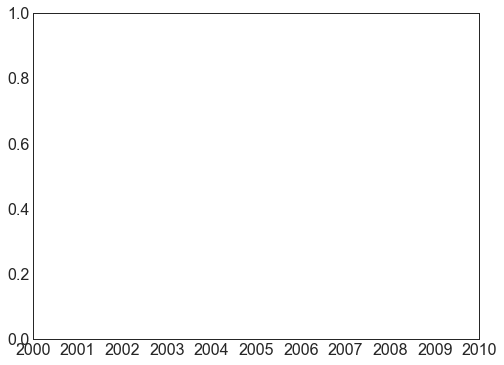

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(drq,t['nDhsl'])
ax.grid(grid)

In [17]:
skw=df['locn_brcd'].unique()
drq=df['drq'].unique()

def myplot(l,grid=True):
    
    t = df[df['locn_brcd']==skw]
    t.size()
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(drq,t['nDhsl'])
    ax.grid(grid)
widgets.interact_manual(myplot,l=skw)

interactive(children=(Dropdown(description='l', options=('AB0093310                     ', 'AB0093510         …

<function __main__.myplot(l, grid=True)>

In [16]:
df1[df1['drq']=='2022-03-23']

,drq,locn_brcd,nhwsps,nsps,Yhsl,nDhsl
522221,2022-03-23,AB0093310,1,1.0,12.0,12.0
522222,2022-03-23,AB0093510,1,1.0,5.0,5.0
522223,2022-03-23,AB0094310,37,1.0,2.0,2.0
522224,2022-03-23,AB0094510,2,0.0,0.0,0.0
522225,2022-03-23,AB0095410,6,2.0,160.0,150.0
...,...,...,...,...,...,...
530777,2022-03-23,SY0523135,141,0.0,0.0,0.0
530778,2022-03-23,SY0523136,106,0.0,0.0,0.0
530779,2022-03-23,TG0101110,1,0.0,0.0,0.0
530780,2022-03-23,TG0107110,1,0.0,0.0,0.0


In [14]:
df1

,drq,locn_brcd,nhwsps,nsps,Yhsl,nDhsl
522221,2022-03-23,AB0093310,1,1.0,12.0,12.0
522222,2022-03-23,AB0093510,1,1.0,5.0,5.0
522223,2022-03-23,AB0094310,37,1.0,2.0,2.0
522224,2022-03-23,AB0094510,2,0.0,0.0,0.0
522225,2022-03-23,AB0095410,6,2.0,160.0,150.0
...,...,...,...,...,...,...
770485,2022-04-20,SY0523135,141,0.0,0.0,0.0
770486,2022-04-20,SY0523136,106,0.0,0.0,0.0
770487,2022-04-20,TG0101110,1,0.0,0.0,0.0
770488,2022-04-20,TG0107110,1,0.0,0.0,0.0
